<a href="https://colab.research.google.com/github/brodyandre/analise_de_vendas_de_evento_online/blob/main/desafio_vendas_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Resultados de um Evento de Vendas Online

O objetivo deste projeto é realizar uma análise detalhada dos resultados de um evento de vendas online de uma empresa. Para isso, foi coletado um conjunto de dados que contém informações sobre os **clientes que mais gastaram com produtos durante um período de 5 dias**, que é a duração do evento.

A análise visa identificar o **cliente com a maior compra durante a semana** de vendas, que será premiado pela loja. Além disso, a análise pode fornecer insights valiosos para que a empresa crie novas **estratégias para atrair mais clientes** e melhorar suas futuras campanhas de vendas.

## Objetivos da Análise:
- **Identificar o cliente com o maior gasto durante o evento**.
- **Analisar o total gasto por cada cliente**.
- **Visualizar os 10 clientes com o maior total de compras**.
- **Ajudar a empresa a planejar estratégias de marketing mais eficazes**.


## 1. Leitura dos Dados
📄 Leitura do arquivo JSON
O primeiro passo é carregar os dados de vendas de clientes a partir de um arquivo JSON.

In [90]:
import pandas as pd

# Caminho do arquivo
file_path = '/content/dados_vendas_clientes.json'

# Leitura do arquivo JSON
dados = pd.read_json(file_path)

# Exibindo as primeiras linhas do DataFrame
dados.head()


,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@ANA _LUCIA 321', 'DieGO ARMANDIU 210', 'DieGO ARMANDIU 210', 'DieGO ARMANDIU 210'], 'Valor da compra': ['R$ 836,5', 'R$ 573,33', 'R$ 392,8', 'R$ 512,3..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['Isabely JOanes 738', 'Isabely JOanes 738', 'Isabely JOanes 738', 'Isabely JOanes 738'], 'Valor da compra': ['R$ 825,31', 'R$ 168,07', 'R$ 339,18', 'R$ ..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['Isabely JOanes 738', 'JOãO Gabriel 671', 'Julya meireles 914', 'Julya meireles 914'], 'Valor da compra': ['R$ 682,05', 'R$ 386,34', 'R$ 622,65', 'R$ 63..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['Julya meireles 914', 'MaRIA Julia 444', 'MaRIA Julia 444', 'MaRIA Julia 444'], 'Valor da compra': ['R$ 390,3', 'R$ 759,16', 'R$ 334,47', 'R$ 678,78']}"
4,"{'Data de venda': '10/06/2022', 'Cliente': ['MaRIA Julia 444', 'PEDRO PASCO 812', 'Paulo castro 481', 'Thiago fritzz 883'], 'Valor da compra': ['R$ 314,24', 'R$ 311,15', 'R$ 899,16', 'R$ 885,24']}"


## 2. Normalização dos Dados
🔄 Expansão de Dados Aninhados
Normalizamos a coluna dados_vendas, que contém dados aninhados, para expandi-los em um formato mais utilizável.

In [91]:
# Expandindo os dados que estão dentro da coluna 'dados_vendas'
dados_normalizados = pd.json_normalize(dados['dados_vendas'])

# Visualizando os dados normalizados
print("Dados Normalizados:")
display(dados_normalizados.head())


Dados Normalizados:


,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO ARMANDIU 210, DieGO ARMANDIU 210]","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabely JOanes 738, Isabely JOanes 738]","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya meireles 914, Julya meireles 914]","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Julia 444, MaRIA Julia 444]","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castro 481, Thiago fritzz 883]","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


## 3. Análise Exploratória de Dados
📊 Informações Gerais
Obtenha uma visão geral das informações do DataFrame, como tipos de dados e contagem de entradas não nulas.

In [92]:
# Informações Gerais
print("\nInformações Gerais:")
print(dados_normalizados.info())



Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    5 non-null      object
 1   Cliente          5 non-null      object
 2   Valor da compra  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes
None


## 📉 Estatísticas Descritivas
Calcule as estatísticas descritivas para as colunas numéricas.

In [93]:
# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas Descritivas:")
display(dados_normalizados.describe())



Estatísticas Descritivas:


,Data de venda,Cliente,Valor da compra
count,5,5,5
unique,5,5,5
top,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO ARMANDIU 210, DieGO ARMANDIU 210]","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
freq,1,1,1


## 🚫 Verificação de Valores Nulos
Verifique a presença de valores nulos nas colunas.

In [94]:
# Verificação de valores nulos
print("\nVerificação de Valores Nulos:")
print(dados_normalizados.isnull().sum())



Verificação de Valores Nulos:
Data de venda      0
Cliente            0
Valor da compra    0
dtype: int64


## 4. Transformação e Preparação dos Dados
🔄 Conversão e Expansão de Colunas
Converta as colunas para o tipo adequado e expanda as listas para criar uma linha para cada cliente.

In [95]:
# Convertendo a coluna 'Data de venda' para o tipo datetime
dados_normalizados['Data de venda'] = pd.to_datetime(dados_normalizados['Data de venda'])

# Expandindo as colunas de 'Cliente' e 'Valor da compra' para ter uma linha para cada cliente
dados_normalizados = dados_normalizados.explode('Cliente')
dados_normalizados = dados_normalizados.explode('Valor da compra')

# Removendo a formatação da moeda e convertendo para número
dados_normalizados['Valor da compra'] = dados_normalizados['Valor da compra'].replace(
    {'R\$': '', ',': ''}, regex=True).astype(float)


## 5. Filtragem dos Dados para Período Específico
🗓 Filtragem por Período
Filtre os dados para o período de 5 dias desde a data de venda mais antiga.

In [96]:
# Agora vamos filtrar os dados para o período de 5 dias (ajustar conforme necessário)
inicio_periodo = dados_normalizados['Data de venda'].min()
fim_periodo = inicio_periodo + pd.Timedelta(days=5)
dados_filtrados = dados_normalizados[(dados_normalizados['Data de venda'] >= inicio_periodo) &
                                     (dados_normalizados['Data de venda'] <= fim_periodo)]


## 6. Análise de Gasto por Cliente
💰 Cálculo do Total Gasto por Cliente
Calcule o total gasto por cada cliente no período de 5 dias.

In [97]:
# Agrupar por cliente e calcular o total gasto
total_gasto_por_cliente = dados_filtrados.groupby('Cliente')['Valor da compra'].sum().reset_index()

# Identificar o cliente com o maior valor gasto
cliente_maior_gasto = total_gasto_por_cliente.loc[total_gasto_por_cliente['Valor da compra'].idxmax()]

# Exibir o cliente com maior gasto
print("Cliente com o Maior Gasto Durante o Evento:")
print(cliente_maior_gasto)


Cliente com o Maior Gasto Durante o Evento:
Cliente            DieGO ARMANDIU 210
Valor da compra              362580.0
Name: 1, dtype: object


## 📊 Resumo da Análise de Gasto por Cliente
Exiba um resumo do total gasto por cada cliente, ordenado do maior para o menor valor.

In [98]:
# Exibir o resumo da análise de gasto por cliente
print("\nResumo da Análise de Gasto por Cliente:")
display(total_gasto_por_cliente.sort_values(by='Valor da compra', ascending=False))



Resumo da Análise de Gasto por Cliente:


,Cliente,Valor da compra
1,DieGO ARMANDIU 210,362580.0
0,@ANA _LUCIA 321,120860.0


## 7. Visualização dos Dados
📈 Gráfico de Barras
Crie um gráfico de barras para visualizar os 10 clientes que mais gastaram durante o evento.

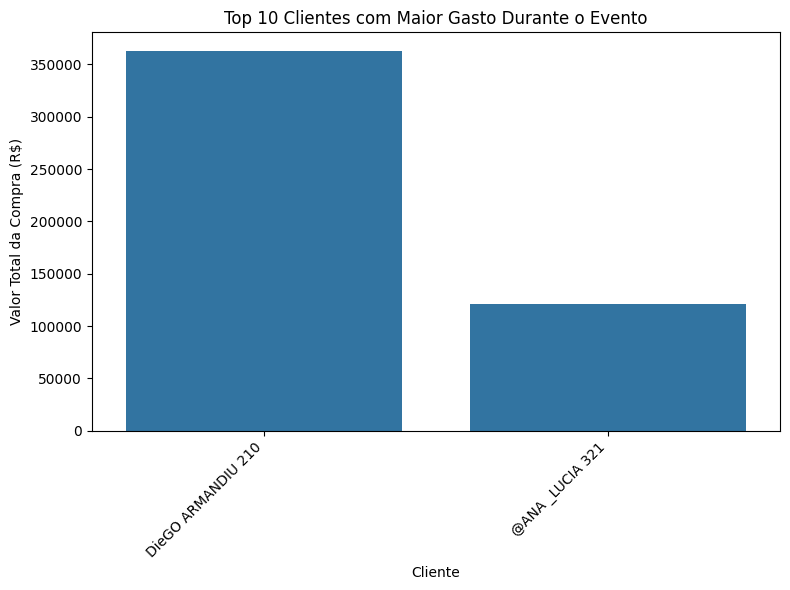

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Cliente', y='Valor da compra', data=total_gasto_por_cliente.sort_values(by='Valor da compra', ascending=False).head(10))
plt.title('Top 10 Clientes com Maior Gasto Durante o Evento')
plt.xlabel('Cliente')
plt.ylabel('Valor Total da Compra (R$)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos clientes para facilitar a leitura
plt.tight_layout()  # Ajustar o layout para não cortar nada
plt.show()
